# Support Vector Machine 

## 1. Definition 

The support vector machine algorithm finds a hyperplane in an N-dimensional space that distinctly classifies the data points.


## 2. Libraries

In [40]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split 

from sklearn.svm import SVC # Support Vector Machine 

from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
import seaborn as sns

from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve
from sklearn import metrics

import matplotlib.pyplot as plt 

from sklearn.metrics import classification_report

import pickle 

## 3. Load Data 

In [4]:
loan = pd.read_csv('../data/BB.DD_MODELOS.csv')
loan.shape

(460541, 50)

In [5]:
loan.head()

,Unnamed: 0,loan_acceptance,"('acc_now_delinq',)","('acc_open_past_24mths',)","('all_util',)","('annual_inc',)","('avg_cur_bal',)","('bc_util',)","('collections_12_mths_ex_med',)","('delinq_2yrs',)",...,"('tax_liens',)","('tot_cur_bal',)","('total_acc',)","('total_bal_ex_mort',)","('total_bc_limit',)","('total_cu_tl',)","('total_rev_hi_lim',)","('MORTGAGE',)","('OWN',)","('RENT',)"
0,0,1,-0.070414,1.010683,-4.391856,1.169092,0.632931,-1.756350,-0.121123,-0.373769,...,-0.136687,1.966093,1.645054,1.082435,0.364780,3.872116,0.169542,-0.990665,2.932031,-0.817319
1,1,1,-0.070414,-0.889720,2.588767,-0.388652,-0.712121,1.344204,-0.121123,-0.373769,...,-0.136687,-0.865215,-1.644651,-0.937178,-0.813060,-1.373566,-0.787800,-0.990665,-0.341061,1.223512
2,2,1,-0.070414,2.594353,-3.840754,0.518772,0.083906,-1.236562,-0.121123,-0.373769,...,-0.136687,0.889188,0.082444,-0.081508,3.037755,3.872116,1.523901,1.009422,-0.341061,-0.817319
3,3,1,-0.070414,0.693949,-4.391856,-0.358722,-0.783204,-1.443750,-0.121123,-0.373769,...,-0.136687,-0.830447,-0.411012,-0.823391,-0.082319,-1.373566,-0.081056,-0.990665,-0.341061,1.223512
4,4,1,-0.070414,0.060482,3.690971,-0.010558,1.173048,1.020700,-0.121123,0.716465,...,-0.136687,-0.074671,-1.315681,-0.468803,-0.841905,-1.373566,-0.804695,1.009422,-0.341061,-0.817319


In [6]:
data = loan.iloc[:,1:]
data.head()

,loan_acceptance,"('acc_now_delinq',)","('acc_open_past_24mths',)","('all_util',)","('annual_inc',)","('avg_cur_bal',)","('bc_util',)","('collections_12_mths_ex_med',)","('delinq_2yrs',)","('delinq_amnt',)",...,"('tax_liens',)","('tot_cur_bal',)","('total_acc',)","('total_bal_ex_mort',)","('total_bc_limit',)","('total_cu_tl',)","('total_rev_hi_lim',)","('MORTGAGE',)","('OWN',)","('RENT',)"
0,1,-0.070414,1.010683,-4.391856,1.169092,0.632931,-1.756350,-0.121123,-0.373769,-0.018151,...,-0.136687,1.966093,1.645054,1.082435,0.364780,3.872116,0.169542,-0.990665,2.932031,-0.817319
1,1,-0.070414,-0.889720,2.588767,-0.388652,-0.712121,1.344204,-0.121123,-0.373769,-0.018151,...,-0.136687,-0.865215,-1.644651,-0.937178,-0.813060,-1.373566,-0.787800,-0.990665,-0.341061,1.223512
2,1,-0.070414,2.594353,-3.840754,0.518772,0.083906,-1.236562,-0.121123,-0.373769,-0.018151,...,-0.136687,0.889188,0.082444,-0.081508,3.037755,3.872116,1.523901,1.009422,-0.341061,-0.817319
3,1,-0.070414,0.693949,-4.391856,-0.358722,-0.783204,-1.443750,-0.121123,-0.373769,-0.018151,...,-0.136687,-0.830447,-0.411012,-0.823391,-0.082319,-1.373566,-0.081056,-0.990665,-0.341061,1.223512
4,1,-0.070414,0.060482,3.690971,-0.010558,1.173048,1.020700,-0.121123,0.716465,-0.018151,...,-0.136687,-0.074671,-1.315681,-0.468803,-0.841905,-1.373566,-0.804695,1.009422,-0.341061,-0.817319


In [7]:
X = data.drop(['loan_acceptance'], axis = 1).values
Y = data['loan_acceptance'].values

In [8]:
# We use the train_test_split function from SkLearn to split our dataset in two groups, the big one is to train the
# model and the 10% (in this case) to predict.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1) # Percentage of the test group.

## 4. SVM Model

We use %%time to know the time that this model needs to be run with our dataset.

Kernel: 'Linear'. We introduce this parameter after tasting 'rbf' kernel. The 'rbf' kernel did not give us an admissible prediction. 

In the last line of the box we train the SVM with our dataset.

We had to set max_iter = 500 to be able to run the code.

In [12]:
%%time

sv = SVC(kernel = 'linear', max_iter = 500)

sv.fit(X_train,Y_train)

CPU times: user 22.8 s, sys: 203 ms, total: 23 s
Wall time: 23 s


/Users/gonzacaur/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


SVC(kernel='linear', max_iter=500)

In [13]:
# Predict
pred = sv.predict(X_test)

# We just want to print the result to check if the output is correct (0 means deny, 1 accept).
print(pred)

[1 0 1 ... 1 1 1]


In [14]:
# Check its accuracy
accuracy_score(Y_test, pred)

0.6896319617848224

The accuracy of the base model was 0.747, so we do not get a good accuracy with the support vector machine. Actually this will be fixed using more parameters. We tried it, but, unfortunatly, our laptops need to much time to run all the models that we performed.

### Confusion Matrix

In [41]:
confusion_matrix = confusion_matrix(Y_test, pred)
confusion_matrix = pd.DataFrame(confusion_matrix)

In [42]:
def conf_matrix(Y_test, pred):
    conf_plot = sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g')
    bottom, top = conf_plot.get_ylim()
    conf_plot.set_ylim(bottom + 0.5, top - 0.5)
    conf_plot.set_ylabel('Predicted Label')
    conf_plot.set_xlabel('True Label');

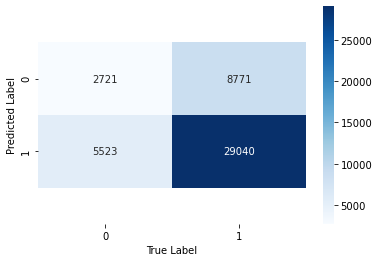

In [43]:
conf_matrix(Y_test, pred)

Looking this confusion matrix we can observe that this model is predicting quite well the right-down box, the people who paid.
However, we can not say the same for the people who do not pay. If we compare the up-left box, people who do not paid detected, with the down-left box, people who do not pay but we believed that yes, our accuracy is very low. 

Basically we have the same problem than with the Logistics Model.

### ROC Curve

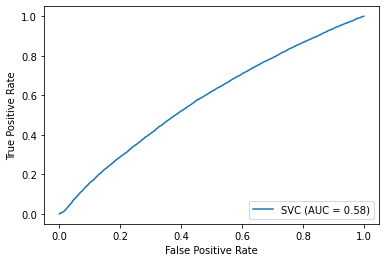

In [30]:
metrics.plot_roc_curve(sv, X_test, Y_test)
plt.show()

### Model Statistics

In [31]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.33      0.24      0.28     11492
           1       0.77      0.84      0.80     34563

    accuracy                           0.69     46055
   macro avg       0.55      0.54      0.54     46055
weighted avg       0.66      0.69      0.67     46055



We can observe again that this model has precision to detect people who pay, so it has a good score for this type of people. But, the score and precision to detect non-payers is quite bad.

### Save the model

Due to some problems with our laptop´s memory we could not save this model.

In [22]:
model = sv
filename = 'svm.sav'
pickle.dump(model, open(filename, 'wb'))